In [ ]:
!cp '/content/drive/MyDrive/ml/dataset.zip' '/content/'

In [ ]:
!unzip '/content/drive/MyDrive/ml/dataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: content/cat_dog_dataset/cat/cat.1018.jpg  
  inflating: content/cat_dog_dataset/cat/cat.1817.jpg  
  inflating: content/cat_dog_dataset/cat/cat.2224.jpg  
  inflating: content/cat_dog_dataset/cat/cat.4839.jpg  
  inflating: content/cat_dog_dataset/cat/cat.4055.jpg  
  inflating: content/cat_dog_dataset/cat/cat.4851.jpg  
  inflating: content/cat_dog_dataset/cat/cat.2483.jpg  
  inflating: content/cat_dog_dataset/cat/cat.4127.jpg  
  inflating: content/cat_dog_dataset/cat/cat.3377.jpg  
  inflating: content/cat_dog_dataset/cat/cat.4770.jpg  
  inflating: content/cat_dog_dataset/cat/cat.1310.jpg  
  inflating: content/cat_dog_dataset/cat/cat.508.jpg  
  inflating: content/cat_dog_dataset/cat/cat.283.jpg  
  inflating: content/cat_dog_dataset/cat/cat.1209.jpg  
  inflating: content/cat_dog_dataset/cat/cat.1312.jpg  
  inflating: content/cat_dog_dataset/cat/cat.2362.jpg  
  inflating: content/cat_dog_dataset/cat/cat.4333.jpg  

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator#API
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense

In [ ]:
dataset_path='/content/content/cat_dog_dataset'

In [ ]:
#define hyperparameters
epochs=10
image_size=(150,150)
batch_size=32


In [ ]:
train_datagen= ImageDataGenerator(
    rescale=1./255,
    validation_split = 0.2
)

In [ ]:
traning_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

Found 8000 images belonging to 2 classes.


In [ ]:
validation_generator=train_datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 2000 images belonging to 2 classes.


In [ ]:
model = Sequential()
#first convolution
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
#pooling layer
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))


In [ ]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(
    traning_generator,
    steps_per_epoch = traning_generator.samples//batch_size,
    validation_data =validation_generator,
    validation_steps=validation_generator.samples//batch_size,
    epochs=epochs
)


Epoch 1/10
250/250 [==============================] - 25s 84ms/step - loss: 1.0076 - accuracy: 0.5536 - val_loss: 0.6606 - val_accuracy: 0.6033
Epoch 2/10
250/250 [==============================] - 17s 70ms/step - loss: 0.6422 - accuracy: 0.6344 - val_loss: 0.6310 - val_accuracy: 0.6472
Epoch 3/10
250/250 [==============================] - 20s 79ms/step - loss: 0.5933 - accuracy: 0.6859 - val_loss: 0.5895 - val_accuracy: 0.6850
Epoch 4/10
250/250 [==============================] - 20s 78ms/step - loss: 0.5137 - accuracy: 0.7483 - val_loss: 0.5665 - val_accuracy: 0.7051
Epoch 5/10
250/250 [==============================] - 19s 78ms/step - loss: 0.4143 - accuracy: 0.8146 - val_loss: 0.5738 - val_accuracy: 0.7082
Epoch 6/10
250/250 [==============================] - 19s 78ms/step - loss: 0.3129 - accuracy: 0.8702 - val_loss: 0.6335 - val_accuracy: 0.6966
Epoch 7/10
250/250 [==============================] - 18s 70ms/step - loss: 0.2316 - accuracy: 0.9129 - val_loss: 0.6738 - val_accuracy:

In [ ]:
import matplotlib.pyplot as plt


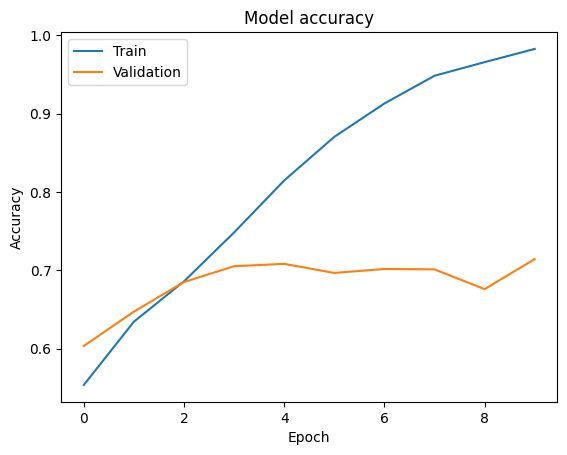

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


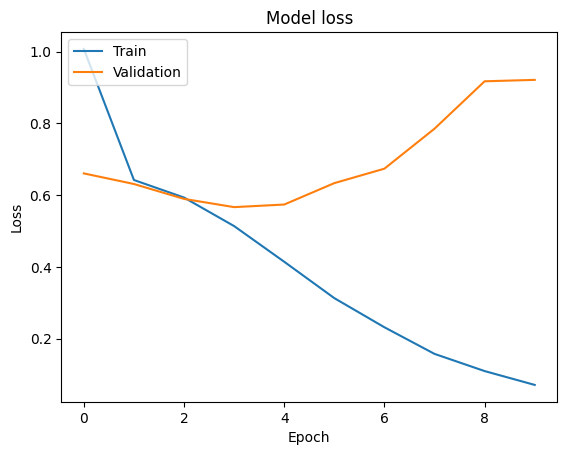

In [ ]:

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model2 = Sequential()
#first convolution
model2.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
model2.add(MaxPool2D(2,2))
model2.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model2.add(MaxPool2D(2,2))


model2.add(Flatten())
model2.add(Dense(units=128,activation='relu'))
model2.add(Dense(units=1,activation='sigmoid'))

In [ ]:
model2.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history2=model2.fit(
    traning_generator,
    steps_per_epoch = traning_generator.samples//batch_size,
    validation_data =validation_generator,
    validation_steps=validation_generator.samples//batch_size,
    epochs=epochs
)

Epoch 1/10
250/250 [==============================] - 23s 82ms/step - loss: 0.6495 - accuracy: 0.6284 - val_loss: 0.5911 - val_accuracy: 0.6754
Epoch 2/10
250/250 [==============================] - 20s 79ms/step - loss: 0.5130 - accuracy: 0.7430 - val_loss: 0.5307 - val_accuracy: 0.7273
Epoch 3/10
250/250 [==============================] - 20s 80ms/step - loss: 0.4306 - accuracy: 0.7979 - val_loss: 0.5250 - val_accuracy: 0.7414
Epoch 4/10
250/250 [==============================] - 17s 69ms/step - loss: 0.3384 - accuracy: 0.8471 - val_loss: 0.5511 - val_accuracy: 0.7470
Epoch 5/10
250/250 [==============================] - 17s 70ms/step - loss: 0.2382 - accuracy: 0.8964 - val_loss: 0.6729 - val_accuracy: 0.7490
Epoch 6/10
250/250 [==============================] - 20s 79ms/step - loss: 0.1465 - accuracy: 0.9441 - val_loss: 0.7086 - val_accuracy: 0.7414
Epoch 7/10
250/250 [==============================] - 20s 80ms/step - loss: 0.0815 - accuracy: 0.9715 - val_loss: 1.0279 - val_accuracy:

In [ ]:
model.save('cat_dog_classification.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model2.save('cat_dog_.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
def predict_image(image_path):
  img=image.load_img(image_path,target_size=image_size)
  img=image.img_to_array(img)#converting to array
  img=np.expand_dims(img,axis=0)#expanding dimentions to match model
  img /=255.0 #normalize

  prediction=model.predict(img)
  return "cat" if prediction < 0.5 else "Dog"




In [ ]:
output = predict_image('/content/German-Shepherd-dog-Alsatian.webp')
output

1/1 [==============================] - 0s 154ms/step


'Dog'